In [1]:
import tensorflow as tf
import model_gen
import os
import configurations
from preprocessing import Label
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.pyplot as plt
import utility
import cv2

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
config = configurations.Configuration()
label = Label()
util = utility.Util()

In [4]:
df = util.get_dataframe()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14679 entries, 0 to 14678
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_names  14679 non-null  object
 1   x_1         14679 non-null  int32 
 2   y_1         14679 non-null  int32 
 3   x_2         14679 non-null  int32 
 4   y_2         14679 non-null  int32 
 5   x_3         14679 non-null  int32 
 6   y_3         14679 non-null  int32 
 7   x_4         14679 non-null  int32 
 8   y_4         14679 non-null  int32 
 9   x_5         14679 non-null  int32 
 10  y_5         14679 non-null  int32 
 11  x_6         14679 non-null  int32 
 12  y_6         14679 non-null  int32 
 13  x_7         14679 non-null  int32 
 14  y_7         14679 non-null  int32 
 15  x_8         14679 non-null  int32 
 16  y_8         14679 non-null  int32 
 17  x_9         14679 non-null  int32 
 18  y_9         14679 non-null  int32 
 19  x_10        14679 non-null  int32 
 20  y_10  

In [6]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=config.VALIDATION_RATIO)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=os.path.join(config.IMAGES_BASE_DIR, "train"),
    x_col="file_names",
    y_col=util.get_column_names(),
    target_size=config.INPUT_DIMS[:2],
    class_mode="multi_output",
    batch_size=config.BATCH_SIZE,
    subset="training"
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=os.path.join(config.IMAGES_BASE_DIR, "train"),
    x_col="file_names",
    y_col=util.get_column_names(),
    target_size=config.INPUT_DIMS[:2],
    class_mode="multi_output",
    batch_size=config.BATCH_SIZE,
    subset="validation"
)

Found 11744 validated image filenames.
Found 2935 validated image filenames.


In [7]:
STEPS_PER_EPOCH = (config.LEN_TRAIN_SPLIT // config.BATCH_SIZE)
VALIDATION_STEPS = (config.LEN_VALIDATION_SPLIT // config.BATCH_SIZE)

In [8]:
STEPS_PER_EPOCH

367

In [9]:
VALIDATION_STEPS

91

In [10]:
model_gen = model_gen.Model()

In [12]:
model = tf.keras.models.load_model("models/model_v6/")
#model = model_gen.create_model_with_vgg16()

94765736/94765736 [==============================] - 18s 0us/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 34)                8738      
                                                                 
Total params: 75,108,514
Trainable params: 51,520,802
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
model_gen.compile(model)

In [15]:
history = model.fit(
    x=train_generator,
    batch_size=config.BATCH_SIZE,
    epochs=config.EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VALIDATION_STEPS
)

Epoch 1/10
367/367 [==============================] - 270s 705ms/step - loss: 331.2482 - val_loss: 308.7142
Epoch 2/10
367/367 [==============================] - 200s 545ms/step - loss: 308.9020 - val_loss: 304.0162
Epoch 3/10
367/367 [==============================] - 202s 551ms/step - loss: 299.9336 - val_loss: 300.3633
Epoch 4/10
367/367 [==============================] - 195s 532ms/step - loss: 294.4354 - val_loss: 291.8116
Epoch 5/10
367/367 [==============================] - 196s 533ms/step - loss: 291.2420 - val_loss: 303.3437
Epoch 6/10
367/367 [==============================] - 191s 521ms/step - loss: 288.4774 - val_loss: 284.7462
Epoch 7/10
367/367 [==============================] - 182s 496ms/step - loss: 288.4694 - val_loss: 297.8944
Epoch 8/10
367/367 [==============================] - 182s 495ms/step - loss: 282.5912 - val_loss: 289.6577
Epoch 9/10
367/367 [==============================] - 183s 499ms/step - loss: 278.1536 - val_loss: 307.3056
Epoch 10/10
367/367 [=======

In [16]:
model_count = len(os.listdir("models")) + 1
model.save("./models/model_v{0}".format(model_count))

INFO:tensorflow:Assets written to: ./models/model_v9\assets


INFO:tensorflow:Assets written to: ./models/model_v9\assets


In [17]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

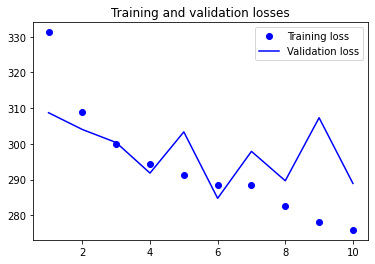

<Figure size 432x288 with 0 Axes>

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()
plt.figure()
plt.show()
